Health Insurance Premium Predictor : This model is used to predict the health insurance premium using 6 input parameter and 1 output paramenter

In [1]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from feature_engine.outliers import ArbitraryOutlierCapper

# ignoreing the all the warnings
warnings.filterwarnings("ignore")

# disable chained_assignment warnings. It comes in affect when we work on view of data instead of a copy
pd.options.mode.chained_assignment = None



Importing dataset

In [2]:
health = pd.read_csv("medical-charges.csv")

In [3]:
print(health.shape)
print(health.columns)
print(health.head)

(1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'premium'], dtype='object')
<bound method NDFrame.head of       age     sex     bmi  children smoker     region      premium
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


In [4]:
# checking if the dataset has any null entries
print(health.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
premium     0
dtype: int64


In [5]:
# if there is any empty entries , we remove it using "dropna" funciton
health1=health.dropna(subset=['premium'])
print(health1.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
premium     0
dtype: int64


In [6]:
# printing the info about the dataset
print(health1.info)

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      premium
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


In [7]:
# creating category array containing sex, religion, and smokin status
cat_col=[]
for i in health1.columns:
    if health1[i].dtypes==object:
        cat_col.append(i)
print(cat_col)

['sex', 'smoker', 'region']


In [8]:
# counting the number of unique elements in the category array
for i in cat_col:
    print(i)
    print(health[i].unique())
    print(health[i].value_counts())
    print('*'*30)

sex
['female' 'male']
sex
male      676
female    662
Name: count, dtype: int64
******************************
smoker
['yes' 'no']
smoker
no     1064
yes     274
Name: count, dtype: int64
******************************
region
['southwest' 'southeast' 'northwest' 'northeast']
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
******************************


In [9]:
# calculating the total count, mean , standard deviation and other parameters
print(health1.describe().T)

           count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
premium   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max  
age          51.000000     64.00000  
bmi          34.693750     53.13000  
children      2.000000      5.00000  
premium   16639.912515  63770.42801  


Creating different charts for dataset analysis

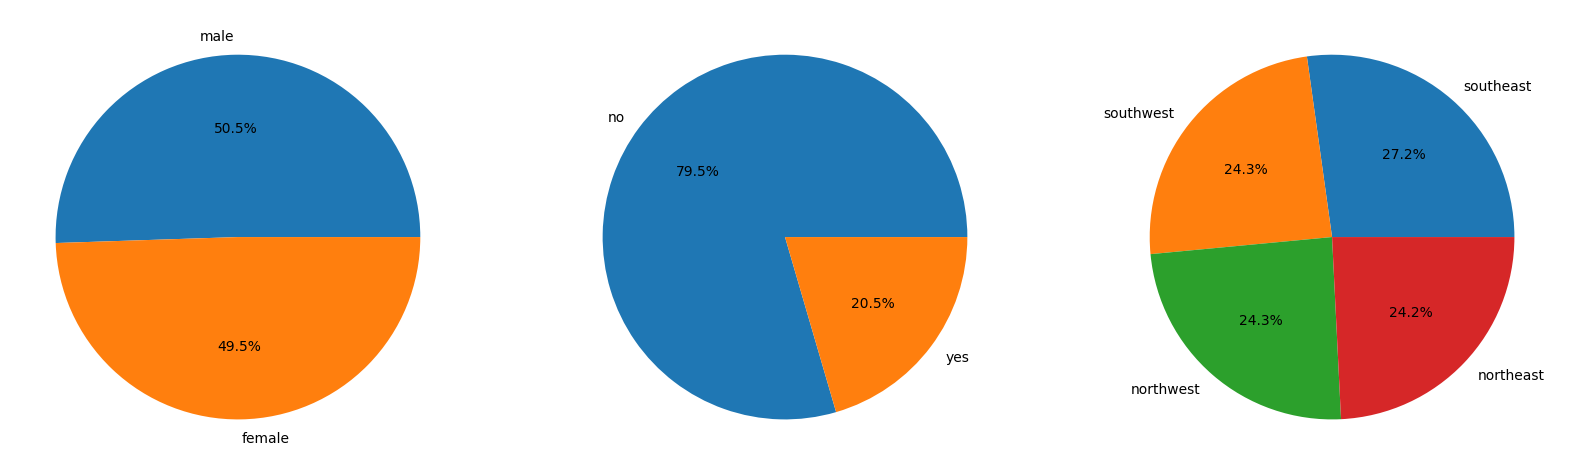

In [14]:
# creating pie chart for sex, smoking status and region features
features = ['sex', 'smoker', 'region']
 
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
 
    x = health1[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
plt.show()

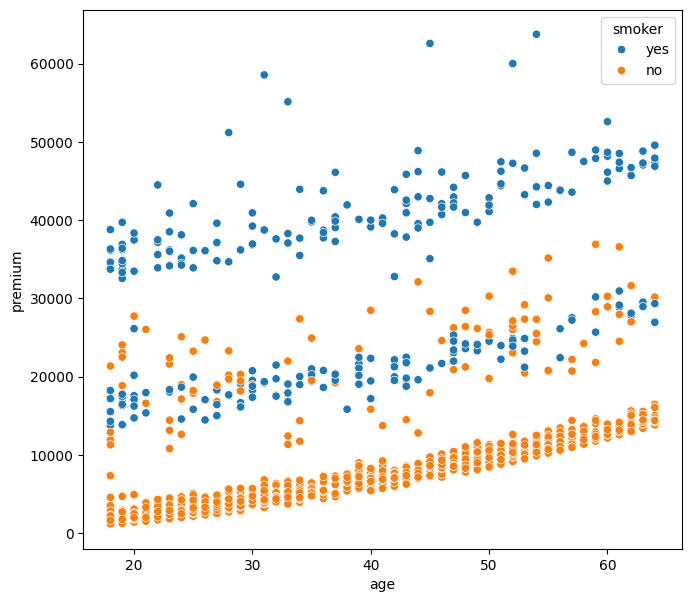

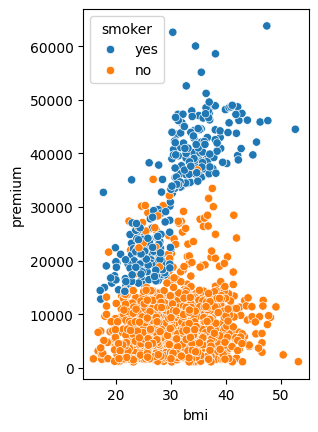

In [22]:
# Scatter graph
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i+1)
    sns.scatterplot(data = health1,x = col,y= 'premium',hue= 'smoker')
    plt.show()

Data Pre-processing

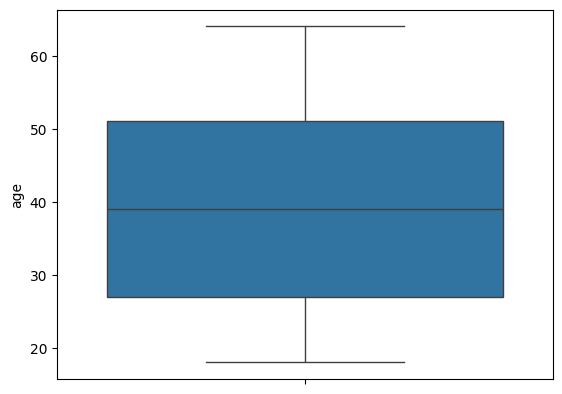

In [10]:
# Check outlying data using boxplot for age
sns.boxplot(health1['age'])
plt.show()

Since, we can see there are no outlying data, we do not need to remove outlying data.

AttributeError: module 'seaborn' has no attribute 'show'

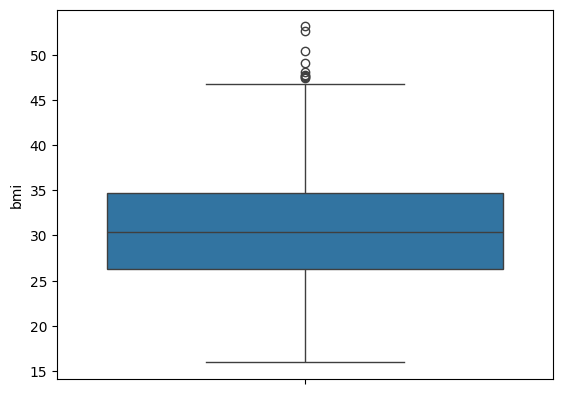

In [11]:
# Checking outlying data in bmi
sns.boxplot(health1['bmi'])
sns.show()

We can see there are some outlying data. So now we have to remove these outlying data.

13.7
47.290000000000006


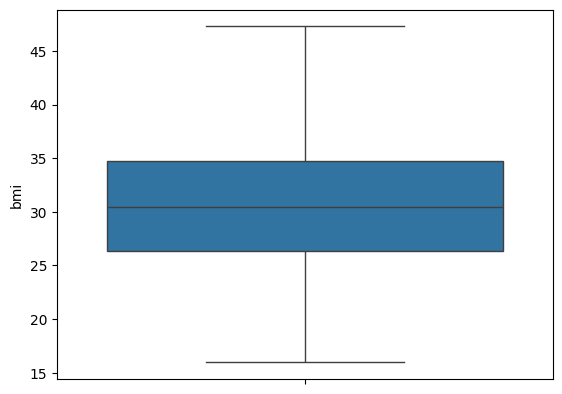

In [12]:
# Cleaning outlying data
q1 = health1['bmi'].quantile(0.25)
q2 = health1['bmi'].quantile(0.5)
q3 = health1['bmi'].quantile(0.75)
iqr = q3 - q1
lowlim = q1- 1.5*iqr
upplim = q3 + 1.5*iqr
print(lowlim)
print(upplim)
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':lowlim},max_capping_dict={'bmi':upplim})
health1[['bmi']]=arb.fit_transform(health1[['bmi']])
sns.boxplot(health1['bmi'])
plt.show()

In [13]:
# calculating the skewness
print(health1['bmi'].skew())
print(health1['age'].skew())

0.23250655837488995
0.05567251565299186


now encoding the data -> 

sex: male = 0, female  =1 ; 

smoker: yes=1, no=0 ;

region: northwest = 0, northeast = 1, southeast = 2, southwest = 3 


In [14]:
health1['sex']=health1['sex'].map({'male':0,'female':1})
health1['smoker']=health1['smoker'].map({'yes':1,'no':0})
health1['region']=health1['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})
print(health1.info)

<bound method DataFrame.info of       age  sex     bmi  children  smoker  region      premium
0      19    1  27.900         0       1       3  16884.92400
1      18    0  33.770         1       0       2   1725.55230
2      28    0  33.000         3       0       2   4449.46200
3      33    0  22.705         0       0       0  21984.47061
4      32    0  28.880         0       0       0   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       0       0  10600.54830
1334   18    1  31.920         0       0       1   2205.98080
1335   18    1  36.850         0       0       2   1629.83350
1336   21    1  25.800         0       0       3   2007.94500
1337   61    1  29.070         0       1       0  29141.36030

[1338 rows x 7 columns]>


Evaluating correlation between features

<Axes: >

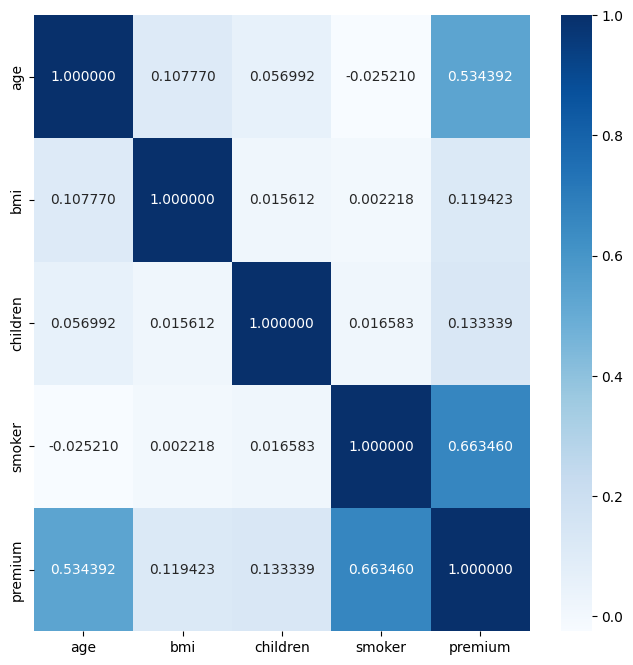

In [38]:
plt.figure(figsize=(8,8))
sns.heatmap(health1.corr(method='spearman'), annot= True, cbar= True, fmt='1f', cmap='Blues')


Dividing data in features and target

In [21]:
X=health1.drop(['premium'],axis=1)
Y=health1[['premium']]
print(X.shape, Y.shape)
print(X.head())
print(Y.head())

(1338, 6) (1338, 1)
   age  sex     bmi  children  smoker  region
0   19    1  27.900         0       1       3
1   18    0  33.770         1       0       2
2   28    0  33.000         3       0       2
3   33    0  22.705         0       0       0
4   32    0  28.880         0       0       0
       premium
0  16884.92400
1   1725.55230
2   4449.46200
3  21984.47061
4   3866.85520


Model Developing and Training

Importing Model Libraries and Dependencies

In [22]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
l1=[]
l2=[]
l3=[]
cvs=0

Dividing the dataset in training and test data

Analising the best random state number

In [23]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
    lrmodel=LinearRegression()
    lrmodel.fit(xtrain,ytrain)
    l1.append(lrmodel.score(xtrain,ytrain))
    l2.append(lrmodel.score(xtest,ytest))
    cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
    l3.append(cvs)
    df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
print(df1)

    train acc  test acc       cvs
0    0.736730  0.799083  0.747192
1    0.747261  0.762118  0.747192
2    0.751551  0.744892  0.747192
3    0.752717  0.740638  0.747192
4    0.760750  0.693514  0.747192
5    0.743086  0.776297  0.747192
6    0.742825  0.779505  0.747192
7    0.746015  0.765037  0.747192
8    0.755240  0.725873  0.747192
9    0.744138  0.776097  0.747192
10   0.763389  0.694485  0.747192
11   0.738401  0.799990  0.747192
12   0.760291  0.708934  0.747192
13   0.738352  0.797652  0.747192
14   0.755326  0.729322  0.747192
15   0.745008  0.770908  0.747192
16   0.759661  0.708763  0.747192
17   0.751586  0.733202  0.747192
18   0.746037  0.764491  0.747192
19   0.751246  0.744443  0.747192
20   0.738355  0.795823  0.747192
21   0.753411  0.735972  0.747192
22   0.748660  0.756151  0.747192
23   0.748564  0.755189  0.747192
24   0.743023  0.777091  0.747192
25   0.747809  0.758785  0.747192
26   0.754392  0.733411  0.747192
27   0.755425  0.729483  0.747192
28   0.760342 

For the previous section, we can see that random_state_number = 21 is the best according to test_accuracy and train_accuracy

In [26]:
# Now, dividing the data 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 21)
print(X.shape)
print(x_train.shape, x_test.shape)
print(Y.shape)
print(y_train.shape, y_test.shape)


(1338, 6)
(1070, 6) (268, 6)
(1338, 1)
(1070, 1) (268, 1)


Linear Regression Model

In [27]:
# Linear Regression model
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,X,Y,cv=5,).mean())

0.7452540034263252
0.7685110211702665
0.7471924399959409


SVR Model

In [28]:
from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain1))
print(r2_score(ytest,ypredtest1))
print(cross_val_score(svrmodel,X,Y,cv=5,).mean())

-0.10367199154633355
-0.07082175824011827
-0.10363180148074065


Random Forest Regressor Model

In [29]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())

0.9764069987691146
0.8614716511891549
0.8371533578836274
{'n_estimators': 150}
0.9767886119183629
0.8608204883063082
0.8368228963617164


Gradient Boosting Regressor Model

In [30]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())

0.900405080797905
0.8725216762352381
0.8548387898603794
{'learning_rate': 0.2, 'n_estimators': 19}
0.876428386158517
0.8776230048948384
0.8607242761896201


XCG Regressor Model

In [31]:
xgmodel=XGBRegressor()
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())

0.9960163466627695
0.817857976992497
0.8116017896307346
{'gamma': 0, 'max_depth': 3, 'n_estimators': 15}
0.8781823272505834
0.8745076343763734
0.8623805152148607


Calculating importance of features

In [32]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
print(feats)

# filtering the most important features
important_features=feats[feats['Importance']>0.01]
important_features

          Importance
age         0.043943
sex         0.003198
bmi         0.092427
children    0.012703
smoker      0.841611
region      0.006118


,Importance
age,0.043943
bmi,0.092427
children,0.012703
smoker,0.841611


Finally choosing the best model : XGBRegressor

In [33]:
print("Final Model:")
health1.drop(health1[['sex','region']],axis=1,inplace=True)
Xf=health1.drop(health1[['premium']],axis=1)
X=health1.drop(health1[['premium']],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=42)
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)
print("Train Accuracy : ",r2_score(ytrain,ypredtrain4))
print("Test Accuracy : ",r2_score(ytest,ypredtest4))
print("Cross Value Score : ",cross_val_score(finalmodel,X,Y,cv=5,).mean())

Final Model:
Train Accuracy :  0.875728006196204
Test Accuracy :  0.8832123271902537
Cross Value Score :  0.8617088412874759


Creating the Predictive Model

In [34]:
new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'no','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
print(finalmodel.predict(new_data))

[2495.0447]
